In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

In [2]:
fVoltage = '/Users/yuntse/data/slarchetto/monitoring/TPCVoltage_202205150000.csv'
fCurrent = '/Users/yuntse/data/slarchetto/monitoring/FieldShellCurrent_202205150000.csv'

In [3]:
Voltage = pd.read_csv(fVoltage, header = None, skiprows = 1, names = ['Time', 'Voltage'])
Current = pd.read_csv(fCurrent, header = None, skiprows = 1, names = ['Time', 'Current'])

In [8]:
Voltage['Time'] = Voltage['Time'].transform(lambda t: datetime.strptime(t, '%Y-%m-%d %H:%M:%S.%f'))
Current['Time'] = Current['Time'].transform(lambda t: datetime.strptime(t, '%Y-%m-%d %H:%M:%S.%f'))

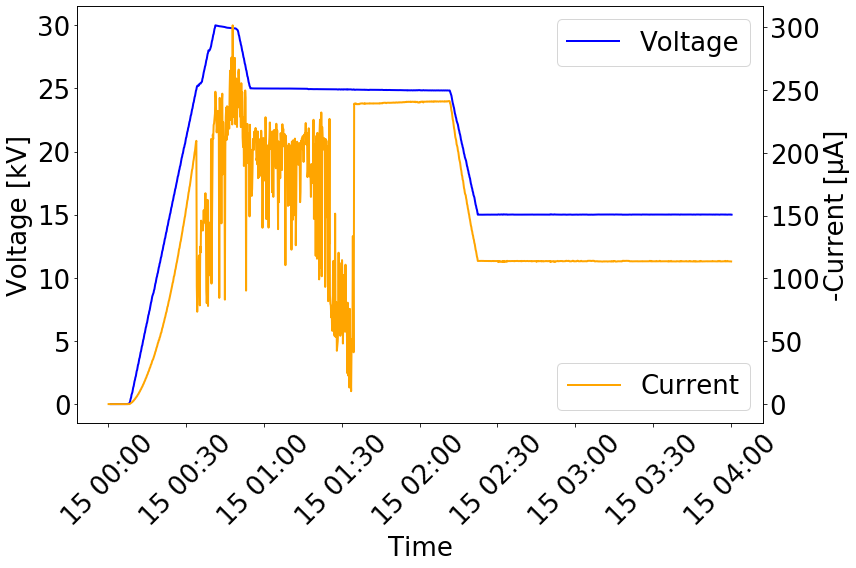

In [37]:
# create figure and axis objects with subplots()
fig, ax = plt.subplots(figsize = (12,8))

# make a plot
ax.plot( Voltage['Time'], Voltage['Voltage'], label = 'Voltage', color = 'blue', lw = 2)
# set x-axis label
ax.set_xlabel('Time', fontsize = 26)
ax.tick_params(axis = 'x', labelrotation = 45, labelsize = 26)
# set y-axis label
ax.set_ylabel('Voltage [kV]', fontsize = 26)
ax.tick_params(axis = 'y', labelsize = 26)
# twin object for two different y-axis on the sample plot
ax2 = ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot( Current['Time'], -Current['Current']/1000., label = 'Current', color = 'orange', lw = 2)
ax2.set_ylabel('-Current [µA]', fontsize = 26)
ax2.tick_params(axis = 'y', labelsize = 26)

ax.legend(loc = 'upper right', ncol = 1, fontsize = 26)
ax2.legend(loc = 'lower right', ncol = 1, fontsize = 26)
plt.tight_layout()
plt.show()

# save the plot as a file
fig.savefig('/Users/yuntse/Documents/DUNE/SLArchetto/Monitoring/HV_202205150000.png')